In [76]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input,Flatten
from sklearn import preprocessing

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.model_selection import train_test_split

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [61]:
def sexNew(row): #c for column
    if row["Sex"] == "male":
        return 0
    elif row["Sex"] == "female":
        return 1
    else:
        return 2

def embarkedNew(row):
    if row["Embarked"] == "S":
        return 0
    elif row["Embarked"] == "C":
        return 1
    elif row["Embarked"] == "Q":
        return 2
    else:
        return 3
    
data = pd.read_csv('train.csv')
data["AgeNew"] = data["Age"]
data["AgeNew"] = data["AgeNew"].fillna(data["AgeNew"].mean())
data["SexNew"] = data.apply(sexNew, axis=1)
data["EmbarkedNew"] = data.apply(embarkedNew, axis=1)

#shuffle data
data = data.sample(frac=1) 
train_data, val_data = train_test_split(data, test_size=0.2)

# train_data.shape
# val_data.shape
train_data
# val_data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeNew,SexNew,EmbarkedNew
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S,29.699118,0,0
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S,3.000000,0,0
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C,29.699118,1,1
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S,35.000000,0,0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.699118,0,2
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S,50.000000,1,0
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S,32.000000,0,0
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S,59.000000,0,0
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S,27.000000,0,0
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S,47.000000,0,0


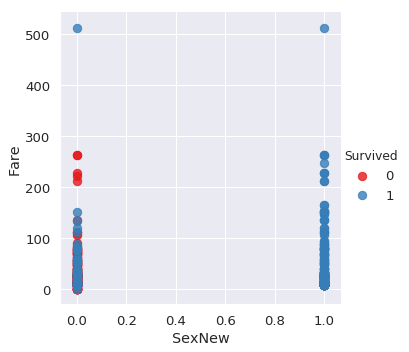

In [62]:
sns.lmplot('SexNew', 'Fare', data=train_data, hue='Survived',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [113]:
# Specify inputs for the model
train_features = train_data[["Pclass", "SibSp", "Parch", "Fare", "AgeNew", "SexNew", "EmbarkedNew"]].as_matrix()
survived_label = train_data[["Survived"]].as_matrix().flatten()

#standard scale matrix - SibSp, Parch, Fare, AgeNew
matrix1 = train_data[["SibSp", "Parch", "Fare", "AgeNew"]].as_matrix()

#normalize 
scaler = StandardScaler()
matrix1 = scaler.fit_transform(matrix1) #only do fit_transform on train

#one-hot matrix - Pclass, SexNew, EmbarkedNew
matrix2 = train_data[["Pclass", "SexNew", "EmbarkedNew"]].as_matrix()
matrix2_pclass = np.zeros((matrix2.shape[0], 3))
matrix2_sexnew = np.zeros((matrix2.shape[0], 1))
matrix2_embarkednew = np.zeros((matrix2.shape[0], 4))

row_len = matrix2.shape[0] 
for row in range(0, row_len):

    matrix2_pclass[row, matrix2[row , 0] - 1] = 1 
    matrix2_sexnew[row] = matrix2[row , 1]
    matrix2_embarkednew[row, matrix2[row , 2]] = 1

#concaatenate the two matrices

new_train_features = np.concatenate([matrix1, matrix2_pclass, matrix2_sexnew, matrix2_embarkednew], axis = 1)

# Feature names
survival_features = ["Pclass", "SibSp", "Parch", "Fare", "AgeNew", "SexNew", "EmbarkedNew"]


########
# val
########

val_features = val_data[["Pclass", "SibSp", "Parch", "Fare", "AgeNew", "SexNew", "EmbarkedNew"]].as_matrix()
val_label = val_data[["Survived"]].as_matrix().flatten() #actual prediction

#standard scale matrix - SibSp, Parch, Fare, AgeNew
matrix1_val = val_data[["SibSp", "Parch", "Fare", "AgeNew"]].as_matrix()

#normalize 
matrix1_val = scaler.transform(matrix1_val) #only do fit_transform on train

#one-hot matrix - Pclass, SexNew, EmbarkedNew
matrix2_val = val_data[["Pclass", "SexNew", "EmbarkedNew"]].as_matrix()
matrix2_val_pclass = np.zeros((matrix2_val.shape[0], 3))
matrix2_val_sexnew = np.zeros((matrix2_val.shape[0], 1))
matrix2_val_embarkednew = np.zeros((matrix2_val.shape[0], 4))

row_len_val = matrix2_val.shape[0] 

for row in range(0, row_len_val):

    matrix2_val_pclass[row, matrix2_val[row , 0] - 1] = 1 
    matrix2_val_sexnew[row] = matrix2_val[row , 1]
    matrix2_val_embarkednew[row, matrix2_val[row , 2]] = 1

#concaatenate the two matrices

new_val_features = np.concatenate([matrix1_val, matrix2_val_pclass, matrix2_val_sexnew, matrix2_val_embarkednew], axis = 1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in 

In [110]:
# # Fit the SVM model
# #low C = 2 ** -5 underfits, high C = 2 ** 5 overfits
# #small gamma less complexity large gamma more complexity
# model = svm.SVC(kernel='rbf', C = 1, gamma= 2 ** -5)
# model.fit(train_features, survived_label)

#nn model
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(12,))) 
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary() #print our our model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 200)               2400      
_________________________________________________________________
dropout_8 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 101       
Total params: 22,601
Trainable params: 22,601
Non-trainable params: 0
_________________________________________________________________


In [111]:
#Compile the model
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [112]:
# Train the model.
model.fit(
  new_train_features,
  survived_label,
  epochs=100,
  batch_size=16,
  validation_data=(new_val_features, val_label),
  shuffle = True,
)

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 1ms/step - loss: 0.6003 - acc: 0.6854 - val_loss: 0.5545 - val_acc: 0.7207
Epoch 2/100
712/712 [==============================] - 0s 326us/step - loss: 0.5065 - acc: 0.7697 - val_loss: 0.4791 - val_acc: 0.7877
Epoch 3/100
712/712 [==============================] - 0s 313us/step - loss: 0.4697 - acc: 0.7823 - val_loss: 0.4675 - val_acc: 0.7821
Epoch 4/100
712/712 [==============================] - 0s 320us/step - loss: 0.4412 - acc: 0.7963 - val_loss: 0.4724 - val_acc: 0.7765
Epoch 5/100
712/712 [==============================] - 0s 319us/step - loss: 0.4492 - acc: 0.7921 - val_loss: 0.4609 - val_acc: 0.7821
Epoch 6/100
712/712 [==============================] - 0s 319us/step - loss: 0.4423 - acc: 0.7963 - val_loss: 0.4582 - val_acc: 0.7765
Epoch 7/100
712/712 [==============================] - 0s 318us/step - loss: 0.4367 - acc: 0.8160 - val_loss: 0.4604 - val_acc: 0.7821
Epoch 8/100

In [ ]:
val_predicted = model.predict(new_val_features)
val_predicted.shape

In [66]:
target_names = ["Not Survived", "Survived"]
print(classification_report(val_label, val_predicted, target_names=target_names))

              precision    recall  f1-score   support

Not Survived       0.77      0.90      0.83        99
    Survived       0.84      0.68      0.75        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

